In [94]:
import numpy as np 
import os 
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import tensorflow as tf
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.callbacks import EarlyStopping


In [35]:
data_path="D:/Project AI/Bone Break Dataset/Bone Break Classification/Bone Break Classification"

In [36]:
class_name=os.listdir(data_path)
class_name

['Avulsion fracture',
 'Comminuted fracture',
 'Fracture Dislocation',
 'Greenstick fracture',
 'Hairline Fracture',
 'Impacted fracture',
 'Longitudinal fracture',
 'Oblique fracture',
 'Pathological fracture',
 'Spiral Fracture']

In [37]:
def plot_image(class_name):
    plt.figure(figsize=(15,8))
    for i,category in enumerate(class_name):
        image_path=data_path+'/'+category
        image_in_folder=os.listdir(image_path)
        
        first_img=image_in_folder[1]
        first_img_path=image_path+'/'+first_img
        
        img=image.load_img(first_img_path)
        img_arr=image.img_to_array(img)/255
        
        plt.subplot(2,5,i+1)
        plt.imshow(img_arr)
        plt.title(category)
        plt.axis('off')
        plt.grid()
    plt.show()

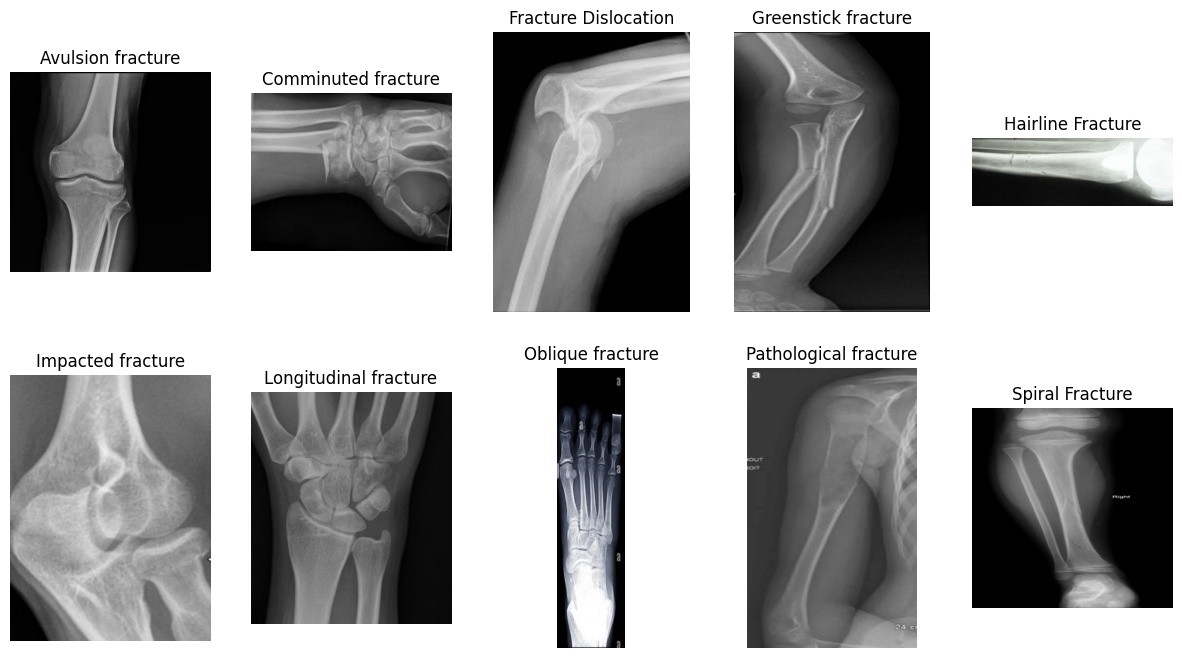

In [38]:
plot_image(class_name)

In [95]:
data_generator=ImageDataGenerator(rescale=1/255,
                                  validation_split=0.3)

In [96]:
train_data=data_generator.flow_from_directory(data_path,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              subset='training',
                                              shuffle=True
                                              )

Found 795 images belonging to 10 classes.


In [97]:
test_data=data_generator.flow_from_directory(data_path,
                                              batch_size=1,
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              subset='validation',
                                              shuffle=True
                                              )

Found 334 images belonging to 10 classes.


In [103]:
model=Sequential()
weight_decay=0.001

model.add(Conv2D(32,3,padding='same',activation='relu',kernel_regularizer=l2(weight_decay),input_shape=[224,224,3]))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.3))

model.add(Conv2D(32,3,padding='same',activation='relu',kernel_regularizer=l2(weight_decay)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))



model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [104]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [105]:
es=EarlyStopping(patience=5,monitor='loss')

In [106]:
model_hist=model.fit(train_data,validation_data=test_data,epochs=10,callbacks=[es])

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 234ms/step - accuracy: 0.0984 - loss: 2.7528 - val_accuracy: 0.1497 - val_loss: 2.3114
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - accuracy: 0.1628 - loss: 2.2942 - val_accuracy: 0.1766 - val_loss: 2.3505
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 336ms/step - accuracy: 0.1946 - loss: 2.2057 - val_accuracy: 0.2186 - val_loss: 2.2942
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 410ms/step - accuracy: 0.4073 - loss: 1.8439 - val_accuracy: 0.2096 - val_loss: 2.3835
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 410ms/step - accuracy: 0.5833 - loss: 1.3279 - val_accuracy: 0.2096 - val_loss: 2.6170
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 376ms/step - accuracy: 0.7478 - loss: 0.8714 - val_accuracy: 0.2814 - val_loss: 2.8035
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - accuracy: 0.8564 - loss: 0.5468 - val_accuracy: 0.2725 - val_loss: 3.0136
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - accuracy: 0.9152 - loss: 0.3708 - val_accuracy:

In [78]:
model.evaluate(train_data)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9914 - loss: 0.0602


[0.06553934514522552, 0.9911797046661377]

In [79]:
model.evaluate(test_data)

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3241 - loss: 7.0872


[7.607817649841309, 0.3198198080062866]